In [1]:
from numpy import loadtxt
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dense
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Dataset: Pima Indians onset of diabetes dataset.

It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

In [2]:
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# df = pd.read_csv('pima-indians-diabetes.csv')
# split into input (X) and output (y) variables
X = dataset[:,:8]
y = dataset[:,8]
# X = df[["6","148","72","35","0","33.6","0.627","50"]]
# y = df["1"]

In [3]:
nn_model = keras.Sequential()
# first line defines input & first hidden layer
hl1 = keras.layers.Dense(12, input_shape = (8,), activation='relu')
nn_model.add(hl1)
hl2 = keras.layers.Dense(8, activation = 'relu')
nn_model.add(hl2)
op = keras.layers.Dense(1, activation = 'sigmoid')
nn_model.add(op)

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
nn_model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


In [6]:
# we log the accuracy and loss after every 50 epochs
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [7]:
num_epochs = 150
history = nn_model.fit(
    X,
    y,
    callbacks = [ProgBarLoggerNEpochs(num_epochs, every_n = 50)],
    verbose = 0,
    epochs = num_epochs,
)

Epoch [50/ 150], Accuracy: 0.6810, Loss: 0.5915
Epoch [100/ 150], Accuracy: 0.7109, Loss: 0.5607
Epoch [150/ 150], Accuracy: 0.7396, Loss: 0.5363


In [8]:
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose = 0)
print(f"Loss: {loss}, Accuracy: {accuracy}")

Loss: 0.5029451847076416, Accuracy: 0.7489177584648132


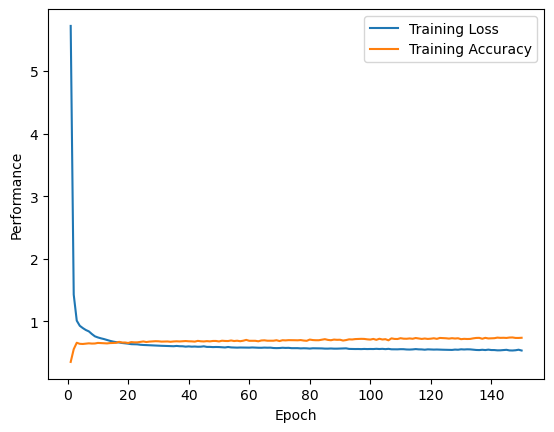

In [9]:
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [10]:
predictions = (nn_model.predict(X) > 0.5).astype(int)
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
